### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
company wants to understand the factors on which the pricing of cars depends. 
The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
 
### Step 1: Reading and Understanding the Data

In [241]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
mf=pd.read_csv("CarPrice_Assignment.csv")
mf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


As it is already mentioned in the problem statement that A variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. we need to consider only company name as the independent variable for model building. 

In [242]:
#create new column companyName and drop CarName column
mf['CompanyName']=mf['CarName'].str.split(" ").str[0]
mf=mf.drop(['CarName'],axis=1)

# As car_ID will not help us in analysis

mf=mf.drop(['car_ID'],axis=1)
mf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [243]:
#mf.CompanyName.unique()

In [244]:
#Correct spelling mistakes in ComapnyName
mf['CompanyName']=mf['CompanyName'].str.lower()
mf['CompanyName']=mf['CompanyName'].str.replace('maxda','mazda')
mf['CompanyName']=mf['CompanyName'].str.replace('porcshce','porsche')
mf['CompanyName']=mf['CompanyName'].str.replace('toyouta','toyota')
mf['CompanyName']=mf['CompanyName'].str.replace('vokswagen', 'volkswagen')
mf['CompanyName']=mf['CompanyName'].str.replace('vw', 'volkswagen')
mf.CompanyName.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CompanyName, dtype: object

In [245]:
mf.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [246]:
mf.shape

(205, 25)

In [247]:
mf.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [248]:
df_numeric=mf.select_dtypes(include=[np.number])

In [249]:
df_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [250]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

### Step 2: Visualising the Data
### Traget Variable :price

<function matplotlib.pyplot.show(*args, **kw)>

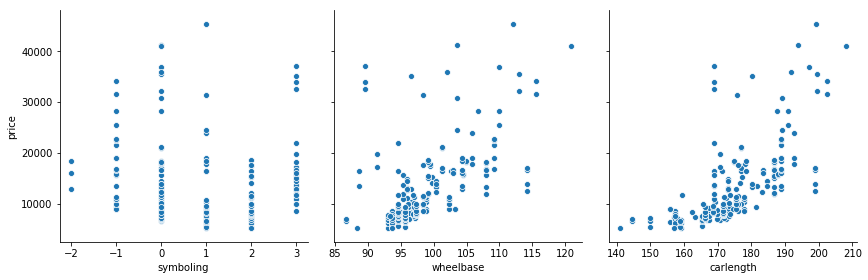

In [251]:
#4 attributes at a time with price on y-axis

sns.pairplot(mf,x_vars=['symboling', 'wheelbase', 'carlength'],y_vars='price',size=4,aspect=1,kind='scatter')

plt.show

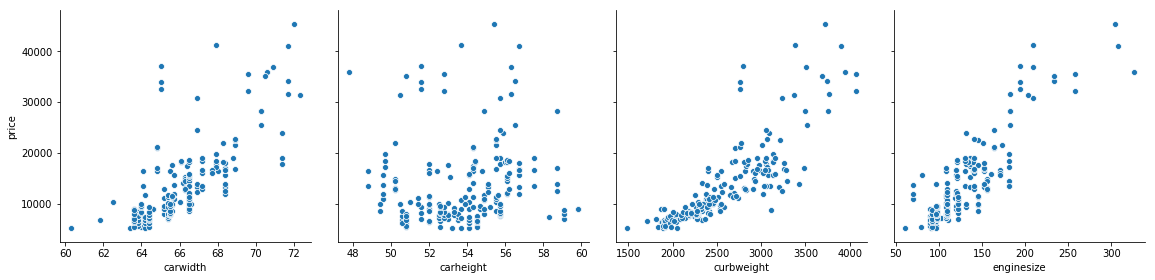

In [252]:
#4 attributes at a time with price on y-axis
sns.pairplot(mf,x_vars=['carwidth','carheight','curbweight','enginesize'],y_vars='price',size=4,aspect=1,kind='scatter')
plt.show()

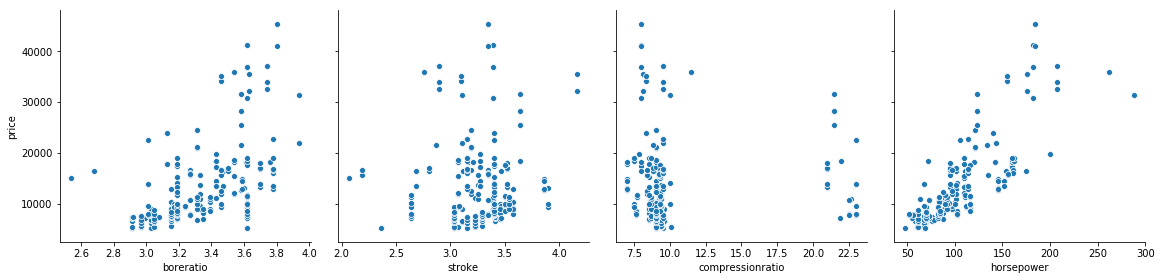

In [253]:
sns.pairplot(mf,x_vars=['boreratio', 'stroke','compressionratio', 'horsepower'],y_vars='price',size=4,aspect=1,kind='scatter')
plt.show()

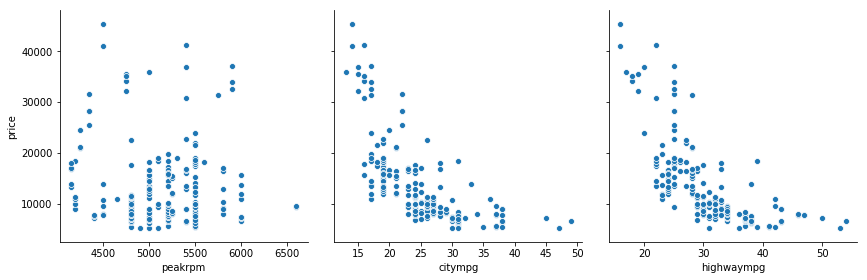

In [254]:
sns.pairplot(mf,x_vars=['peakrpm', 'citympg', 'highwaympg'],y_vars='price',size=4,aspect=1,kind='scatter')
plt.show()

### Visualising Categorical Variables
- follwoing are the categorical variables in data set
- fueltype,
- aspiration,
- doornumber,
- carbody,
- drivewheel,
- enginelocation,
- cylindernumber,
- fuelsystem,
- CompanyName

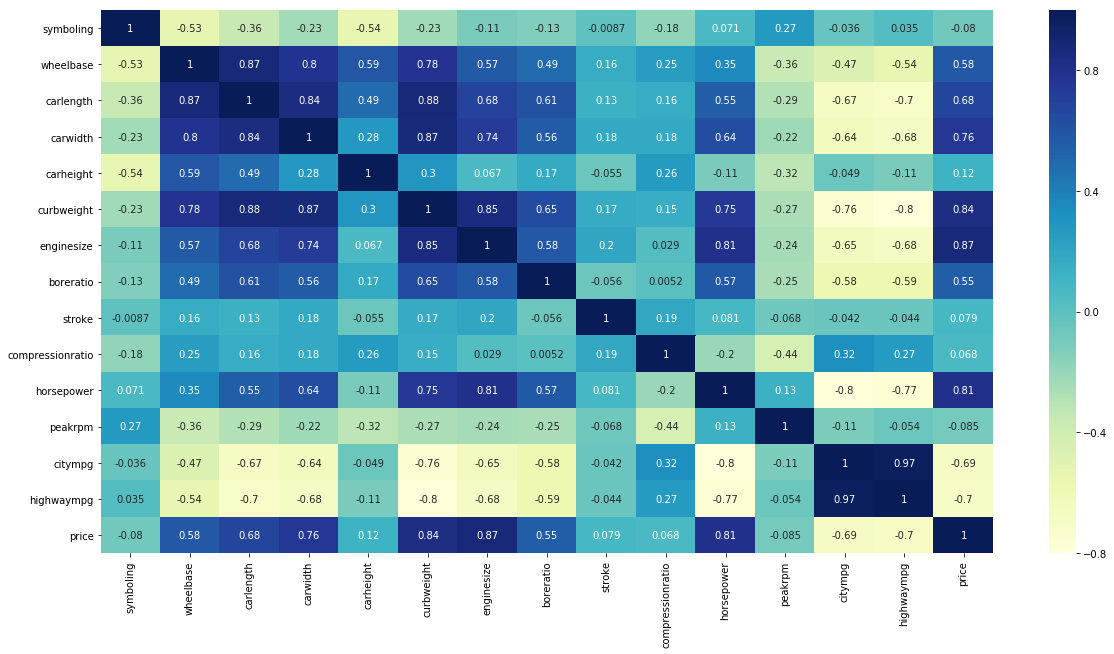

In [255]:
plt.figure(figsize=(20,10))
sns.heatmap(mf.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [256]:
df_object=mf.select_dtypes(include=[np.object])
df_object.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName'],
      dtype='object')

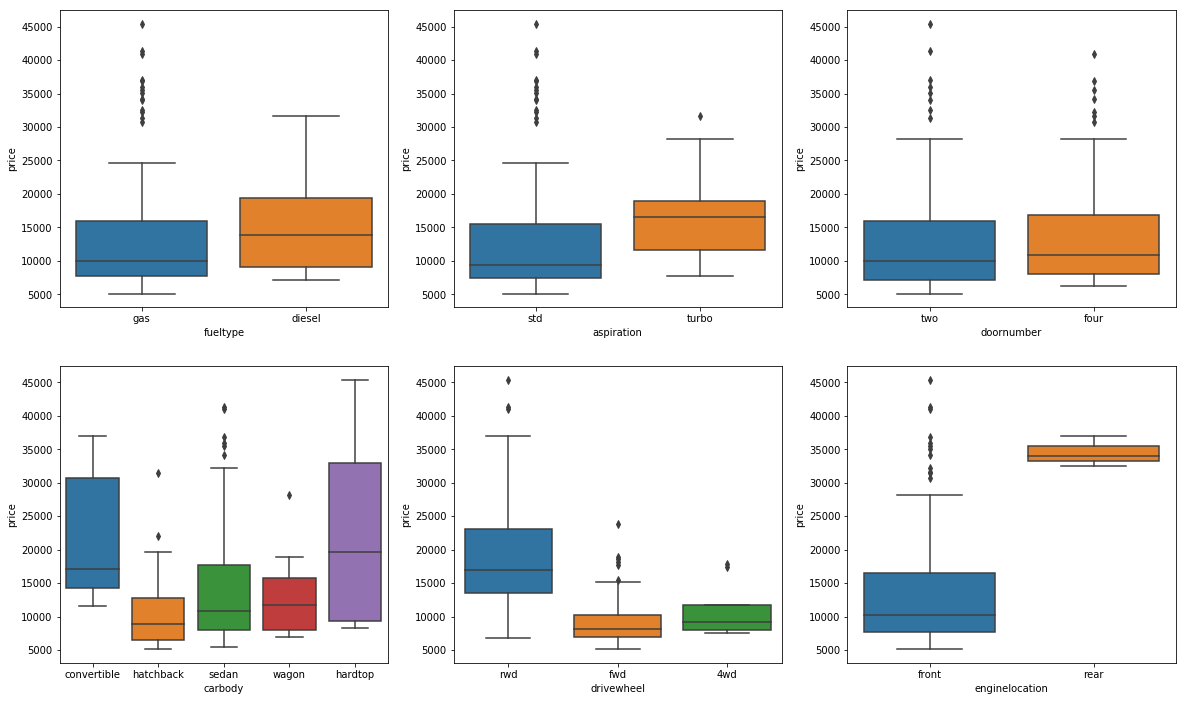

In [257]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='fueltype',y='price',data=mf)
plt.subplot(2,3,2)
sns.boxplot(x='aspiration',y='price',data=mf)
plt.subplot(2,3,3)
sns.boxplot(x='doornumber',y='price',data=mf)
plt.subplot(2,3,4)
sns.boxplot(x='carbody',y='price',data=mf)
plt.subplot(2,3,5)
sns.boxplot(x='drivewheel',y='price',data=mf)
plt.subplot(2,3,6)
sns.boxplot(x='enginelocation',y='price',data=mf)

plt.show()

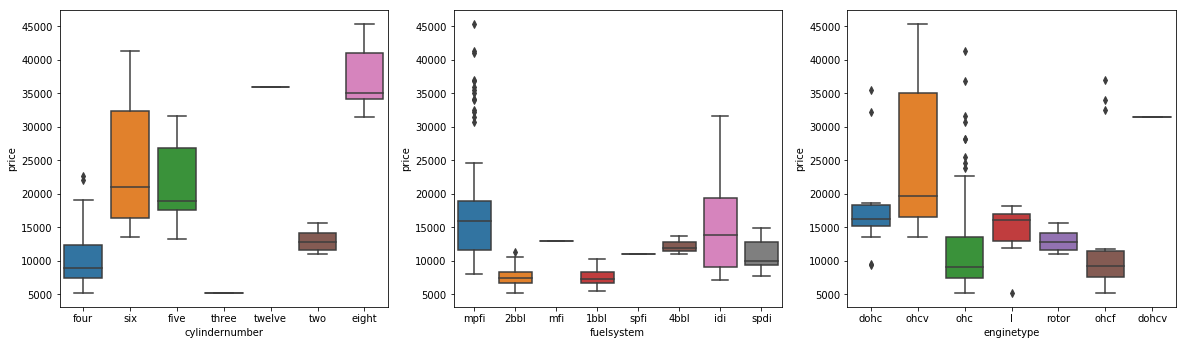

In [258]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data=mf)
plt.subplot(2,3,2)
sns.boxplot(x='fuelsystem',y='price',data=mf)
plt.subplot(2,3,3)
sns.boxplot(x='enginetype',y='price',data=mf)

plt.show()

### Remove Outliers

In [259]:
print(mf.fueltype.value_counts())
print(mf.aspiration.value_counts())
print(mf.doornumber.value_counts())
print(mf.carbody.value_counts())
print(mf.drivewheel.value_counts())
print(mf.enginelocation.value_counts())
print(mf.cylindernumber.value_counts())
print(mf.fuelsystem.value_counts())
print(mf.enginetype.value_counts())
print(mf.CompanyName.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             

In [260]:
#dropping the rows in the categorical columns having one values basically we are remvoing outliers
mf=mf[mf.enginetype!="dohcv"]
mf=mf[mf.cylindernumber!="tweleve"]
mf=mf[mf.cylindernumber!="three"]
mf=mf[mf.fuelsystem!="spfi"]
mf=mf[mf.fuelsystem!="mfi"]
mf=mf[mf.CompanyName!="mercury"]

### Step 3: Data Preparation


In [261]:
mf.cylindernumber.unique()

array(['four', 'six', 'five', 'twelve', 'two', 'eight'], dtype=object)

In [262]:
mf.doornumber.unique()

array(['two', 'four'], dtype=object)

In [263]:
print(mf['fueltype'].unique())
print(mf['aspiration'].unique())
print(mf['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['front' 'rear']


### categorical variables with two levels
-  fueltype,
- aspiration,
- enginelocation
 as dummy varaibles for these varaibles will be 1(k-1)
where k is number of levels in categorical varaibles

In [264]:
txt_num_vars={
    "doornumber":{'two':0, 'four':1},       
    "fueltype":{'gas':1,'diesel':0},
    "aspiration":{'std':1,'turbo':0},
    "enginelocation":{'front':1,'rear':0}
}
mf.replace(txt_num_vars,inplace=True)
mf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Dummy Variables
 - variables drivewheel has three levels.
 - We need to convert these levels into integer as well. 
 - For this, we will use dummy variables.

### Categorical variables with more than 3 levels
- carbody,
- fuelsystem,
- enginetype,
- drivewheel,
- CompanyName

In [265]:
df=pd.get_dummies(mf)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 204
Data columns (total 66 columns):
symboling                  200 non-null int64
fueltype                   200 non-null int64
aspiration                 200 non-null int64
doornumber                 200 non-null int64
enginelocation             200 non-null int64
wheelbase                  200 non-null float64
carlength                  200 non-null float64
carwidth                   200 non-null float64
carheight                  200 non-null float64
curbweight                 200 non-null int64
enginesize                 200 non-null int64
boreratio                  200 non-null float64
stroke                     200 non-null float64
compressionratio           200 non-null float64
horsepower                 200 non-null int64
peakrpm                    200 non-null int64
citympg                    200 non-null int64
highwaympg                 200 non-null int64
price                      200 non-null float64
carbo

### Step 4: Splitting the Data into Training and Testing Sets

In [267]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the Features
Scaling is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
- Min-Max scaling 
- Standardisation (mean-0, sigma-1) 
- This time, we will use MinMax scaling.

In [268]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'CompanyName_alfa-romero',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'Co

#### Apply scaler() to all the columns except the 'two-level' and 'dummy' variables
- Two level categorical variables :  "doornumber","fueltype","aspiration","enginelocation".
- Variables for which we have created dummy variables : carbody,drivewheel,enginetype,cylindernumber,fuelsystem,CompanyName

In [269]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

numVars=['symboling','wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

df_train[numVars]=scaler.fit_transform(df_train[numVars])

In [270]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
78,0.8,1,1,0,1,0.157895,0.125645,0.200000,0.181818,0.074921,...,0,0,0,0,0,0,0,0,0,0
3,0.8,1,1,1,1,0.346749,0.457831,0.389474,0.500000,0.224316,...,0,0,0,0,0,0,0,0,0,0
190,1.0,1,1,0,1,0.182663,0.270224,0.157895,0.236364,0.172275,...,0,0,0,0,0,0,0,0,1,0
27,0.6,1,0,0,1,0.157895,0.125645,0.136842,0.163636,0.158816,...,0,0,0,0,0,0,0,0,0,0
94,0.6,1,1,0,1,0.182663,0.263339,0.136842,0.518182,0.051144,...,1,0,0,0,0,0,0,0,0,0


In [271]:
df_train.shape

(140, 66)

### Dividing into X and Y sets for the model building

In [272]:
Y_train=df_train.pop('price')
X_train=df_train
Y_train.head()

78     0.036662
3      0.217759
190    0.119015
27     0.083646
94     0.052332
Name: price, dtype: float64

#### Building our model
 - As we have many varaibles we will go for RFE as manual feature elimination will not be a significant method here. 
 - using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE
 - Recursive feature elimination

In [273]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [274]:
# Running RFE with the output number of the variable equal to 10

lm=LinearRegression()
lm.fit(X_train,Y_train)
rfe=RFE(lm,15) # running RFE
rfe = rfe.fit(X_train, Y_train)

In [275]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 50),
 ('fueltype', False, 14),
 ('aspiration', False, 10),
 ('doornumber', False, 42),
 ('enginelocation', True, 1),
 ('wheelbase', False, 4),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 28),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 11),
 ('stroke', True, 1),
 ('compressionratio', False, 18),
 ('horsepower', False, 24),
 ('peakrpm', True, 1),
 ('citympg', False, 3),
 ('highwaympg', True, 1),
 ('carbody_convertible', False, 40),
 ('carbody_hardtop', False, 39),
 ('carbody_hatchback', False, 31),
 ('carbody_sedan', False, 47),
 ('carbody_wagon', False, 41),
 ('drivewheel_4wd', False, 48),
 ('drivewheel_fwd', False, 43),
 ('drivewheel_rwd', False, 45),
 ('enginetype_dohc', False, 25),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 32),
 ('enginetype_ohcf', False, 27),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 19

In [276]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'stroke', 'peakrpm', 'highwaympg', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'CompanyName_alfa-romero',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_jaguar'],
      dtype='object')

In [277]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carheight', 'boreratio', 'compressionratio', 'horsepower', 'citympg',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'CompanyName_audi', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_mazda',
       'CompanyName_mitsubishi', 'CompanyName_nissan', 'CompanyName_peugeot',
       'CompanyName_plymouth', 'CompanyName_porsche', 'CompanyName_renault',
       'CompanyName_saab', 'CompanyName_subaru', 'C

### Building model using statsmodel, for the detailed statistics

In [278]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe=X_train[col]

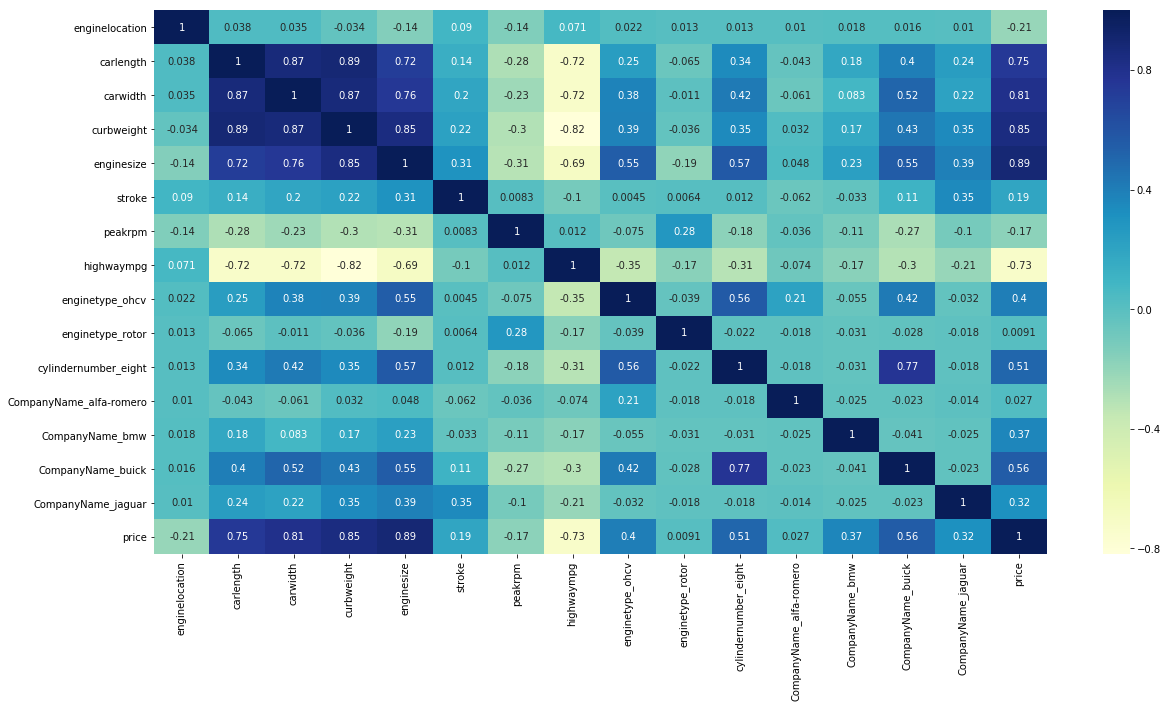

In [279]:
X_Y=pd.concat([X_train_rfe,Y_train],axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(X_Y.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [280]:
#Adding constant variable
import statsmodels.api as sm
X_train_lm1=sm.add_constant(X_train_rfe)

In [281]:
#model 1
lm1=sm.OLS(Y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.07e-65
Time:                        22:13:09   Log-Likelihood:                 219.98
No. Observations:                 140   AIC:                            -408.0
Df Residuals:                     124   BIC:                            -360.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1907      0.081      2.359      0.020       0.031       0.351
enginelocation             -0.2991      0.065     -4.588      0.000      -0.428      -0.170
carlength                  -0.0929      0.059     -1.578      0.117      -0.209       0.024
carwidth                    0.2836      0.052      5.451      0.000       0.181       0.387
curbweight                  0.2243      0.077      2.918      0.004       0.072       0.376
enginesize                  0.5228      0.104      5.026      0.000       0.317       0.729
stroke                     -0.0806      0.037     -2.149      0.034      -0.155      -0.006
peakrpm                     0.1329      0.031      4.352      0.000       0.072       0.193
highwaympg                  0.0633      0.049      1.286      0.201      -0.034       0.161
enginetype_ohcv            -0.0753      0.030     -2.519      0.013      -0.135      -0.016
enginetype_rotor            0.1210      0.039      3.089      0.002       0.043       0.199
cylindernumber_eight        0.0764      0.064      1.202      0.232      -0.049       0.202
CompanyName_alfa-romero     0.0848      0.041      2.089      0.039       0.004       0.165
CompanyName_bmw             0.2315      0.028      8.317      0.000       0.176       0.287
CompanyName_buick           0.1446      0.044      3.322      0.001       0.058       0.231
CompanyName_jaguar          0.0949      0.053      1.784      0.077      -0.010       0.200
==============================================================================
Omnibus:                       17.697   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.500
Skew:                           0.777   Prob(JB):                     2.14e-05
Kurtosis:                       4.128   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
#insgnifcant variables :carlength ,highwaympg,cylindernumber_eight,CompanyName_jaguar
X_train_new1=X_train_lm1.drop(['const'],axis=1)

#### lets calculate the VIF

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_new1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,enginelocation,57.40
3,curbweight,44.90
1,carlength,37.73
4,enginesize,31.61
2,carwidth,22.61
5,stroke,22.19
7,highwaympg,19.03
6,peakrpm,6.80
10,cylindernumber_eight,4.14
13,CompanyName_buick,3.28


In [284]:
#lets drop highwaympg as it is having high VIF and it is insignificant 0.201
X_train_new2=X_train_new1.drop(['highwaympg'],axis=1)

In [285]:
#model 2
X_train_lm2=sm.add_constant(X_train_new2)
lm2=sm.OLS(Y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.11e-66
Time:                        22:13:09   Log-Likelihood:                 219.06
No. Observations:                 140   AIC:                            -408.1
Df Residuals:                     125   BIC:                            -364.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2466      0.068      3.608      0.000       0.111       0.382
enginelocation             -0.3095      0.065     -4.770      0.000      -0.438      -0.181
carlength                  -0.0889      0.059     -1.508      0.134      -0.205       0.028
carwidth                    0.2834      0.052      5.433      0.000       0.180       0.387
curbweight                  0.1834      0.070      2.614      0.010       0.045       0.322
enginesize                  0.4904      0.101      4.847      0.000       0.290       0.691
stroke                     -0.0694      0.037     -1.898      0.060      -0.142       0.003
peakrpm                     0.1174      0.028      4.173      0.000       0.062       0.173
enginetype_ohcv            -0.0693      0.030     -2.341      0.021      -0.128      -0.011
enginetype_rotor            0.1038      0.037      2.812      0.006       0.031       0.177
cylindernumber_eight        0.0741      0.064      1.163      0.247      -0.052       0.200
CompanyName_alfa-romero     0.0797      0.040      1.967      0.051      -0.000       0.160
CompanyName_bmw             0.2340      0.028      8.406      0.000       0.179       0.289
CompanyName_buick           0.1541      0.043      3.581      0.000       0.069       0.239
CompanyName_jaguar          0.1108      0.052      2.133      0.035       0.008       0.213
==============================================================================
Omnibus:                       21.688   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.263
Skew:                           0.838   Prob(JB):                     2.68e-07
Kurtosis:                       4.542   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
#insignificant :carlength,stroke,cylindernumber_eight,CompanyName_alfa-romero
X_train_new3=X_train_lm2.drop(['const'],axis=1)
vif=pd.DataFrame()
X=X_train_new3
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,carlength,37.48
3,curbweight,36.81
4,enginesize,31.51
0,enginelocation,24.91
2,carwidth,22.42
5,stroke,21.67
6,peakrpm,6.59
9,cylindernumber_eight,4.07
12,CompanyName_buick,3.22
7,enginetype_ohcv,2.53


In [287]:
#as we can see carlength is having high vif and it is insgnificant 0.134 so lets drop it
X_train_new4=X_train_new3.drop(['carlength'],axis=1)

In [288]:
#model 3
X_train_lm3=sm.add_constant(X_train_new4)
lm3=sm.OLS(Y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.48e-67
Time:                        22:13:09   Log-Likelihood:                 217.79
No. Observations:                 140   AIC:                            -407.6
Df Residuals:                     126   BIC:                            -366.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2395      0.069      3.495      0.001       0.104       0.375
enginelocation             -0.3159      0.065     -4.856      0.000      -0.445      -0.187
carwidth                    0.2493      0.047      5.276      0.000       0.156       0.343
curbweight                  0.1230      0.058      2.124      0.036       0.008       0.238
enginesize                  0.5100      0.101      5.056      0.000       0.310       0.710
stroke                     -0.0657      0.037     -1.791      0.076      -0.138       0.007
peakrpm                     0.1180      0.028      4.173      0.000       0.062       0.174
enginetype_ohcv            -0.0573      0.029     -1.999      0.048      -0.114      -0.001
enginetype_rotor            0.1128      0.037      3.082      0.003       0.040       0.185
cylindernumber_eight        0.0489      0.062      0.791      0.430      -0.073       0.171
CompanyName_alfa-romero     0.0801      0.041      1.968      0.051      -0.000       0.161
CompanyName_bmw             0.2293      0.028      8.248      0.000       0.174       0.284
CompanyName_buick           0.1658      0.043      3.898      0.000       0.082       0.250
CompanyName_jaguar          0.1150      0.052      2.208      0.029       0.012       0.218
==============================================================================
Omnibus:                       19.708   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.190
Skew:                           0.773   Prob(JB):                     1.25e-06
Kurtosis:                       4.508   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
#insignificant :stroke,cylindernumber_eight,CompanyName_alfa-romero
X_train_new5=X_train_lm3.drop(['const'],axis=1)    

In [290]:
vif=pd.DataFrame()
X=X_train_new5
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,enginesize,31.14
2,curbweight,24.90
4,stroke,21.55
0,enginelocation,21.39
1,carwidth,18.31
5,peakrpm,6.59
8,cylindernumber_eight,3.81
11,CompanyName_buick,3.12
6,enginetype_ohcv,2.30
12,CompanyName_jaguar,1.66


In [291]:
#lets drop stroke as it insifnificant we can see in model 3 having very high p-value and high vif so lets drop it

X_train_new6=X_train_new5.drop(['stroke'],axis=1)

In [292]:
#model 4
X_train_lm4=sm.add_constant(X_train_new6)
lm4=sm.OLS(Y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.17e-67
Time:                        22:13:09   Log-Likelihood:                 216.03
No. Observations:                 140   AIC:                            -406.1
Df Residuals:                     127   BIC:                            -367.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2504      0.069      3.638      0.000       0.114       0.387
enginelocation             -0.3526      0.062     -5.660      0.000      -0.476      -0.229
carwidth                    0.2537      0.048      5.330      0.000       0.160       0.348
curbweight                  0.1463      0.057      2.572      0.011       0.034       0.259
enginesize                  0.4295      0.091      4.716      0.000       0.249       0.610
peakrpm                     0.1100      0.028      3.905      0.000       0.054       0.166
enginetype_ohcv            -0.0453      0.028     -1.611      0.110      -0.101       0.010
enginetype_rotor            0.1011      0.036      2.782      0.006       0.029       0.173
cylindernumber_eight        0.0808      0.060      1.355      0.178      -0.037       0.199
CompanyName_alfa-romero     0.0852      0.041      2.080      0.039       0.004       0.166
CompanyName_bmw             0.2423      0.027      8.948      0.000       0.189       0.296
CompanyName_buick           0.1586      0.043      3.712      0.000       0.074       0.243
CompanyName_jaguar          0.1140      0.053      2.169      0.032       0.010       0.218
==============================================================================
Omnibus:                       16.701   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.755
Skew:                           0.693   Prob(JB):                     1.89e-05
Kurtosis:                       4.346   Cond. No.                         41.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
#insignificant :enginetype_ohcv,cylindernumber_eight
X_train_new6=X_train_lm4.drop(['const'],axis=1)

In [294]:
vif=pd.DataFrame()
X=X_train_new6
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,enginesize,24.52
2,curbweight,23.74
1,carwidth,18.28
0,enginelocation,10.56
4,peakrpm,6.47
7,cylindernumber_eight,3.51
10,CompanyName_buick,3.09
5,enginetype_ohcv,2.19
11,CompanyName_jaguar,1.66
9,CompanyName_bmw,1.39


In [295]:
#lets drop cylindernumber_eight as it is insignificant 
X_train_new7=X_train_new6.drop(['cylindernumber_eight'],axis=1)

In [296]:
#model 5
X_train_lm5=sm.add_constant(X_train_new7)
lm5=sm.OLS(Y_train,X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     153.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.22e-68
Time:                        22:13:09   Log-Likelihood:                 215.03
No. Observations:                 140   AIC:                            -406.1
Df Residuals:                     128   BIC:                            -370.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2345      0.068      3.446      0.001       0.100       0.369
enginelocation             -0.3401      0.062     -5.502      0.000      -0.462      -0.218
carwidth                    0.2524      0.048      5.286      0.000       0.158       0.347
curbweight                  0.1252      0.055      2.281      0.024       0.017       0.234
enginesize                  0.4760      0.085      5.625      0.000       0.309       0.643
peakrpm                     0.1110      0.028      3.929      0.000       0.055       0.167
enginetype_ohcv            -0.0382      0.028     -1.378      0.170      -0.093       0.017
enginetype_rotor            0.1091      0.036      3.032      0.003       0.038       0.180
CompanyName_alfa-romero     0.0792      0.041      1.939      0.055      -0.002       0.160
CompanyName_bmw             0.2372      0.027      8.817      0.000       0.184       0.290
CompanyName_buick           0.1915      0.035      5.433      0.000       0.122       0.261
CompanyName_jaguar          0.1025      0.052      1.970      0.051      -0.000       0.205
==============================================================================
Omnibus:                       16.085   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.743
Skew:                           0.704   Prob(JB):                     5.16e-05
Kurtosis:                       4.185   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
#insignificant :cylindernumber_eight,CompanyName_alfa-romero
X_train_new8=X_train_lm5.drop(['const'],axis=1)

In [298]:
vif=pd.DataFrame()
X=X_train_new8
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,curbweight,22.15
3,enginesize,21.66
1,carwidth,18.28
0,enginelocation,10.50
4,peakrpm,6.46
5,enginetype_ohcv,2.05
9,CompanyName_buick,2.02
10,CompanyName_jaguar,1.64
8,CompanyName_bmw,1.38
6,enginetype_rotor,1.30


In [299]:
#drop enginetype_ohcv as it insignificant 0.170
X_train_new9=X_train_new8.drop(['enginetype_ohcv'],axis=1)

In [300]:
#model 6
X_train_lm6=sm.add_constant(X_train_new9)
lm6=sm.OLS(Y_train,X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.11e-69
Time:                        22:13:09   Log-Likelihood:                 214.00
No. Observations:                 140   AIC:                            -406.0
Df Residuals:                     129   BIC:                            -373.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2667      0.064      4.159      0.000       0.140       0.394
enginelocation             -0.3639      0.060     -6.112      0.000      -0.482      -0.246
carwidth                    0.2573      0.048      5.385      0.000       0.163       0.352
curbweight                  0.1384      0.054      2.553      0.012       0.031       0.246
enginesize                  0.4082      0.069      5.908      0.000       0.272       0.545
peakrpm                     0.1059      0.028      3.769      0.000       0.050       0.161
enginetype_rotor            0.1004      0.036      2.825      0.005       0.030       0.171
CompanyName_alfa-romero     0.0675      0.040      1.684      0.095      -0.012       0.147
CompanyName_bmw             0.2499      0.025      9.853      0.000       0.200       0.300
CompanyName_buick           0.1942      0.035      5.499      0.000       0.124       0.264
CompanyName_jaguar          0.1320      0.048      2.776      0.006       0.038       0.226
==============================================================================
Omnibus:                       20.361   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.699
Skew:                           0.784   Prob(JB):                     5.86e-07
Kurtosis:                       4.568   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
#insignificant :CompanyName_alfa-romero
X_train_new10=X_train_lm6.drop(['const'],axis=1)

In [302]:
vif=pd.DataFrame()
X=X_train_new10
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,curbweight,21.59
1,carwidth,18.27
3,enginesize,16.10
0,enginelocation,9.93
4,peakrpm,6.46
8,CompanyName_buick,2.02
9,CompanyName_jaguar,1.45
5,enginetype_rotor,1.27
7,CompanyName_bmw,1.27
6,CompanyName_alfa-romero,1.07


In [303]:
#lets drop CompanyName_alfa-romero as it not signficant variable from model 6
X_train_new11=X_train_new10.drop(['CompanyName_alfa-romero'],axis=1)

In [304]:
#model 7
X_train_lm7=sm.add_constant(X_train_new11)
lm7=sm.OLS(Y_train,X_train_lm7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     183.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.35e-69
Time:                        22:13:09   Log-Likelihood:                 212.48
No. Observations:                 140   AIC:                            -405.0
Df Residuals:                     130   BIC:                            -375.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2604      0.064      4.038      0.000       0.133       0.388
enginelocation        -0.3564      0.060     -5.960      0.000      -0.475      -0.238
carwidth               0.2412      0.047      5.116      0.000       0.148       0.335
curbweight             0.1477      0.054      2.719      0.007       0.040       0.255
enginesize             0.4220      0.069      6.108      0.000       0.285       0.559
peakrpm                0.1053      0.028      3.721      0.000       0.049       0.161
enginetype_rotor       0.1024      0.036      2.864      0.005       0.032       0.173
CompanyName_bmw        0.2455      0.025      9.663      0.000       0.195       0.296
CompanyName_buick      0.1904      0.035      5.365      0.000       0.120       0.261
CompanyName_jaguar     0.1228      0.048      2.581      0.011       0.029       0.217
==============================================================================
Omnibus:                       17.381   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.450
Skew:                           0.723   Prob(JB):                     1.33e-05
Kurtosis:                       4.325   Cond. No.                         32.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
#insignificnat :cylindernumber_eight
X_train_new12=X_train_lm7.drop(['const'],axis=1)

In [306]:
vif=pd.DataFrame()
X=X_train_new12
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,curbweight,21.36
1,carwidth,17.58
3,enginesize,15.92
0,enginelocation,9.87
4,peakrpm,6.45
7,CompanyName_buick,2.02
8,CompanyName_jaguar,1.43
5,enginetype_rotor,1.26
6,CompanyName_bmw,1.25


In [307]:
#lets drop carwidth as it is having high vif
X_train_new13=X_train_new12.drop(['carwidth'],axis=1)

In [308]:
X_train_lm8=sm.add_constant(X_train_new13)
lm8=sm.OLS(Y_train,X_train_lm8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     170.1
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.48e-65
Time:                        22:13:09   Log-Likelihood:                 199.64
No. Observations:                 140   AIC:                            -381.3
Df Residuals:                     131   BIC:                            -354.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2218      0.070      3.173      0.002       0.084       0.360
enginelocation        -0.3043      0.064     -4.730      0.000      -0.432      -0.177
curbweight             0.3326      0.044      7.507      0.000       0.245       0.420
enginesize             0.4471      0.075      5.942      0.000       0.298       0.596
peakrpm                0.1231      0.031      4.015      0.000       0.062       0.184
enginetype_rotor       0.1078      0.039      2.763      0.007       0.031       0.185
CompanyName_bmw        0.2285      0.028      8.308      0.000       0.174       0.283
CompanyName_buick      0.2278      0.038      6.006      0.000       0.153       0.303
CompanyName_jaguar     0.0805      0.051      1.574      0.118      -0.021       0.182
==============================================================================
Omnibus:                       15.526   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.980
Skew:                           0.654   Prob(JB):                     4.59e-05
Kurtosis:                       4.309   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
#insignificant :CompanyName_jaguar
X_train_new14=X_train_lm8.drop(['const'],axis=1)

In [310]:
vif=pd.DataFrame()
X=X_train_new14
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,15.91
1,curbweight,11.69
0,enginelocation,9.33
3,peakrpm,6.40
6,CompanyName_buick,1.91
7,CompanyName_jaguar,1.40
4,enginetype_rotor,1.26
5,CompanyName_bmw,1.24


In [311]:
#lets drop CompanyName_jaguar as its insignificant
X_train_new15=X_train_new14.drop(['CompanyName_jaguar'],axis=1)

In [312]:
#model 7
X_train_lm9=sm.add_constant(X_train_new15)
lm9=sm.OLS(Y_train,X_train_lm9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     191.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.86e-66
Time:                        22:13:09   Log-Likelihood:                 198.32
No. Observations:                 140   AIC:                            -380.6
Df Residuals:                     132   BIC:                            -357.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2015      0.069      2.917      0.004       0.065       0.338
enginelocation       -0.2897      0.064     -4.526      0.000      -0.416      -0.163
curbweight            0.3274      0.044      7.370      0.000       0.240       0.415
enginesize            0.4932      0.070      7.075      0.000       0.355       0.631
peakrpm               0.1209      0.031      3.926      0.000       0.060       0.182
enginetype_rotor      0.1159      0.039      2.980      0.003       0.039       0.193
CompanyName_bmw       0.2182      0.027      8.122      0.000       0.165       0.271
CompanyName_buick     0.2048      0.035      5.819      0.000       0.135       0.274
==============================================================================
Omnibus:                       10.504   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.621
Skew:                           0.485   Prob(JB):                      0.00182
Kurtosis:                       4.105   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
X_train_new16=X_train_lm9.drop(['const'],axis=1)

In [314]:
vif=pd.DataFrame()
X=X_train_new16
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,13.93
1,curbweight,11.66
0,enginelocation,9.13
3,peakrpm,6.31
6,CompanyName_buick,1.66
4,enginetype_rotor,1.24
5,CompanyName_bmw,1.18


In [315]:
#lets drop peakrpm as dropping it wont't afftect model's R-squared and it is having VIF>5
X_train_new17=X_train_new16.drop(['peakrpm'],axis=1)

In [316]:
X_train_lm10=sm.add_constant(X_train_new17)
lm10=sm.OLS(Y_train,X_train_lm10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.64e-64
Time:                        22:13:09   Log-Likelihood:                 190.59
No. Observations:                 140   AIC:                            -367.2
Df Residuals:                     133   BIC:                            -346.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2948      0.068      4.315      0.000       0.160       0.430
enginelocation       -0.3282      0.067     -4.928      0.000      -0.460      -0.197
curbweight            0.3052      0.046      6.580      0.000       0.213       0.397
enginesize            0.4975      0.073      6.780      0.000       0.352       0.643
enginetype_rotor      0.1583      0.039      4.021      0.000       0.080       0.236
CompanyName_bmw       0.2095      0.028      7.433      0.000       0.154       0.265
CompanyName_buick     0.1825      0.037      4.990      0.000       0.110       0.255
==============================================================================
Omnibus:                       13.450   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.436
Skew:                           0.570   Prob(JB):                     0.000164
Kurtosis:                       4.300   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
X_train_new18=X_train_lm10.drop(['const'],axis=1)

In [318]:
vif=pd.DataFrame()
X=X_train_new18
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,13.68
1,curbweight,11.27
0,enginelocation,3.39
5,CompanyName_buick,1.58
4,CompanyName_bmw,1.16
3,enginetype_rotor,1.13


In [319]:
#lets drop Curbweight as VIF>5
X_train_new19=X_train_new18.drop(['curbweight'],axis=1)

In [320]:
X_train_lm11=sm.add_constant(X_train_new19)
lm11=sm.OLS(Y_train,X_train_lm11).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.17e-57
Time:                        22:13:09   Log-Likelihood:                 170.87
No. Observations:                 140   AIC:                            -329.7
Df Residuals:                     134   BIC:                            -312.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2128      0.077      2.762      0.007       0.060       0.365
enginelocation       -0.2392      0.075     -3.198      0.002      -0.387      -0.091
enginesize            0.8965      0.047     18.918      0.000       0.803       0.990
enginetype_rotor      0.2257      0.044      5.179      0.000       0.140       0.312
CompanyName_bmw       0.1903      0.032      5.919      0.000       0.127       0.254
CompanyName_buick     0.1448      0.041      3.497      0.001       0.063       0.227
==============================================================================
Omnibus:                       21.879   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.444
Skew:                           0.894   Prob(JB):                     6.66e-07
Kurtosis:                       4.295   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
X_train_new20=X_train_lm11.drop(['const'],axis=1)

In [322]:
vif=pd.DataFrame()
X=X_train_new20
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,enginesize,4.36
0,enginelocation,3.30
4,CompanyName_buick,1.55
3,CompanyName_bmw,1.15
2,enginetype_rotor,1.07


As all the varaibales are significant in model 11 and The VIFs of all the models is <5 we can finalize this as the best model for this dataset.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [323]:
y_train_price = lm11.predict(X_train_lm11)

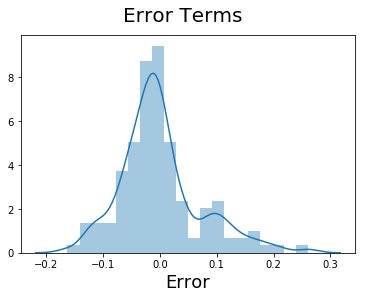

In [324]:
fig=plt.figure()
sns.distplot((Y_train-y_train_price),bins=20)
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel("Error",fontsize=18)
plt.show()

### r2_score for train set

In [325]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_train,y_train_price)
r_squared = r2_score(Y_train,y_train_price)

In [326]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005098299315741518
r_square_value : 0.8675527616448102


## Making Predictions

#### Applying the scaling on the test sets

In [327]:
numVars=['symboling','wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 
df_test[numVars]=scaler.transform(df_test[numVars])

In [328]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.576667,0.866667,0.833333,0.566667,0.966667,0.300155,0.407544,0.366667,0.417879,0.325475,...,0.083333,0.050000,0.033333,0.033333,0.033333,0.016667,0.050000,0.233333,0.050000,0.066667
std,0.258002,0.342803,0.375823,0.499717,0.181020,0.174368,0.204778,0.214977,0.219123,0.227736,...,0.278718,0.219784,0.181020,0.181020,0.181020,0.129099,0.219784,0.426522,0.219784,0.251549
min,0.200000,0.000000,0.000000,0.000000,0.000000,-0.061920,-0.092943,-0.073684,-0.090909,-0.055630,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.182663,0.311532,0.200000,0.254545,0.194930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,1.000000,1.000000,0.266254,0.399312,0.321053,0.381818,0.255944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.427245,0.576592,0.439474,0.609091,0.510655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.662539,0.734940,0.936842,0.900000,0.947959,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
Y_test=df_test.pop('price')
X_test=df_test

In [330]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm

X_test_new=X_test[X_train_new20.columns]
X_test_new.head()

,enginelocation,enginesize,enginetype_rotor,CompanyName_bmw,CompanyName_buick
131,1,0.260504,0,0,0
108,1,0.344538,0,0,0
103,1,0.466387,0,0,0
96,1,0.113445,0,0,0
115,1,0.210084,0,0,0


In [331]:
X_test_new=sm.add_constant(X_test_new)

In [332]:
y_pred_test = lm11.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

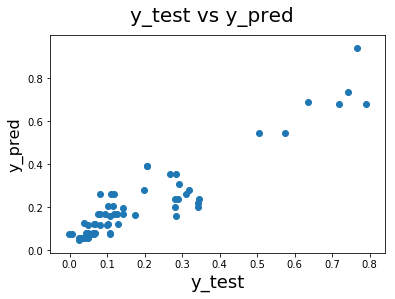

In [333]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

### r2_score for test set

In [334]:
mse = mean_squared_error(Y_test,y_pred_test)
r_squared = r2_score(Y_test,y_pred_test)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.006302127485127419
r_square_value : 0.8431978618255251


In [335]:
Y_test.shape

(60,)

Text(0,0.5,'Price')

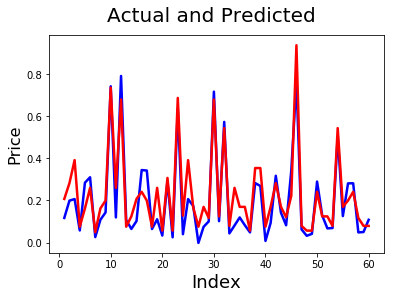

In [336]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16) 

Text(0,0.5,'Y_test-y_pred_test')

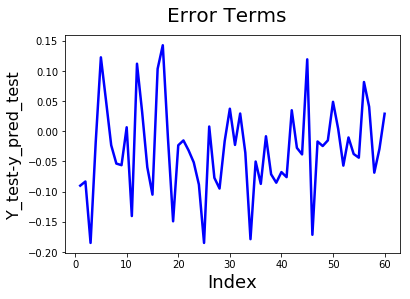

In [337]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test-y_pred_test, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Y_test-y_pred_test', fontsize=16)                # Y-label

###### Conclusion
The R square and Adjusted R square value in Car price data set after removing are  the outliers is .868 and 0.863  respectively. 
The Error Terms are normally distributed.

- r2_score for Test data set :
  - Mean_Squared_Error : 0.006302127485127419
  - r_square_value : 0.8431978618255251 (r2_score)

- re_score for train data set :
  - Mean_Squared_Error : 0.005098299315741518
  - r_square_value : 0.8675527616448102

As we can see that the model seems to be stable, The variables that can affect price are:

- enginesize

- enginelocation

- CompanyName_buick

- CompanyName_bmw

- enginetype_rotor